# Part 1. Principal Component Analysis(Dimensionality Reduction) from scratch

## Overal Description

1.Principal Component Analysis (PCA) is a popular statistical tool for reducing the dimension of a data into a specified smaller dimension, compressing data, visualize data (usually in 2D or 3D), and construct new features from the original data

2.PCA is used to find the principal components of the data that explain most of the variation thereby allowing us to drop certain components of the data which is redundant

3.PCA reduces the dimension of the data by projecting it onto a linear subspace of smaller dimension

In this data set, there are total 10-dimensional(9features and one target) but, for challenge, I have picked 6 features, so,I will examine whether the dimensionality of this data can be reduced in a way to keep vast majority of the original variation. examine whether the dimensionality of this data can be reduced in a way to keep vast majority of the original variation and use PCA to visualize this data in 2D and 3D space in this part 1. 

In [1]:
#import relevant libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from sklearn.model_selection import train_test_split

#Load data set 
df = pd.read_csv('train1.csv')

X = df[['age', 'cost_of_ad','income','n_drivers','n_vehicles','prior_ins_tenure']]
y = df['outcome']

In [2]:
df.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


## standardization

In [3]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)


## Eigendecomposition - Computing Eigenvectors and Eigenvalues



In [4]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00010001  0.14153598  0.74736117 -0.00509736  0.01121074  0.64479864]
 [ 0.14153598  1.00010001  0.10441818 -0.00459691 -0.00407139  0.08685604]
 [ 0.74736117  0.10441818  1.00010001 -0.00512285  0.0056976   0.48658111]
 [-0.00509736 -0.00459691 -0.00512285  1.00010001  0.00662001 -0.00312362]
 [ 0.01121074 -0.00407139  0.0056976   0.00662001  1.00010001  0.00426685]
 [ 0.64479864  0.08685604  0.48658111 -0.00312362  0.00426685  1.00010001]]


In [5]:
# Step 2: Obtain eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 6x6 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 6x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ -6.11521712e-01  -7.77269226e-01  -1.34442448e-01   6.04249424e-02
   -1.29134741e-02   1.02123794e-03]
 [ -1.49005028e-01   3.40513348e-02   2.76168736e-02  -9.69712104e-01
    1.76328454e-01  -6.66485408e-02]
 [ -5.67524154e-01   5.57232661e-01  -5.99675281e-01   8.73716108e-02
   -1.28003271e-02  -7.59001269e-05]
 [  6.45017491e-03  -1.05135351e-04  -2.49736012e-03  -7.51791166e-02
   -6.82400191e-01  -7.27069617e-01]
 [ -9.08802673e-03   5.67304482e-03   3.54087778e-03  -1.74181067e-01
   -7.08953792e-01   6.83314103e-01]
 [ -5.30689019e-01   2.90090717e-01   7.88373844e-01   1.11276768e-01
   -1.70930071e-02  -2.92105043e-03]]

Eigenvalues of Cov(X): 
[ 2.28796501  0.21737537  0.52309615  0.97081782  1.00789464  0.99345108]


In [6]:
# Step 3  Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.2879650070550426, 1.0078946400223097, 0.9934510841627866, 0.97081781695805358, 0.52309614579442076, 0.21737536601344931]


## Get the Number of Principal Components

Now it is time to verify what dimension do I need to speed up ? let's visualizing the data,and then picking the first two or three principal components makes sense. I will likely want to choose to keep the first $l$ principal components  and 85 percent would be good threshold for total proportion of explained variation.

Cumulative proportion of variance explained vector: 
[ 0.38128937  0.54925501  0.71481363  0.87660042  0.9637744   1.        ]


<IPython.core.display.Javascript object>


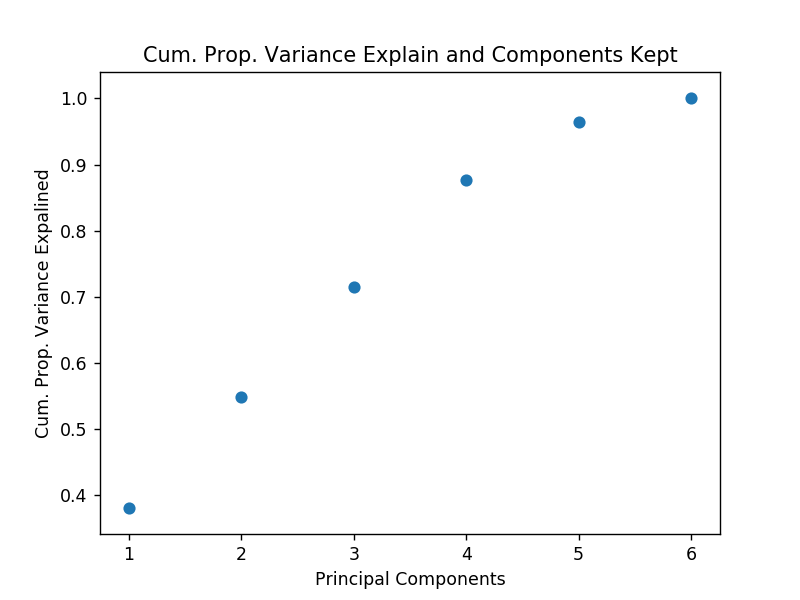

In [7]:
from matplotlib import pyplot as plt
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.scatter(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

From the above plot, I can verity that 4 feature would be acceptable!.

In [8]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:2]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

<IPython.core.display.Javascript object>


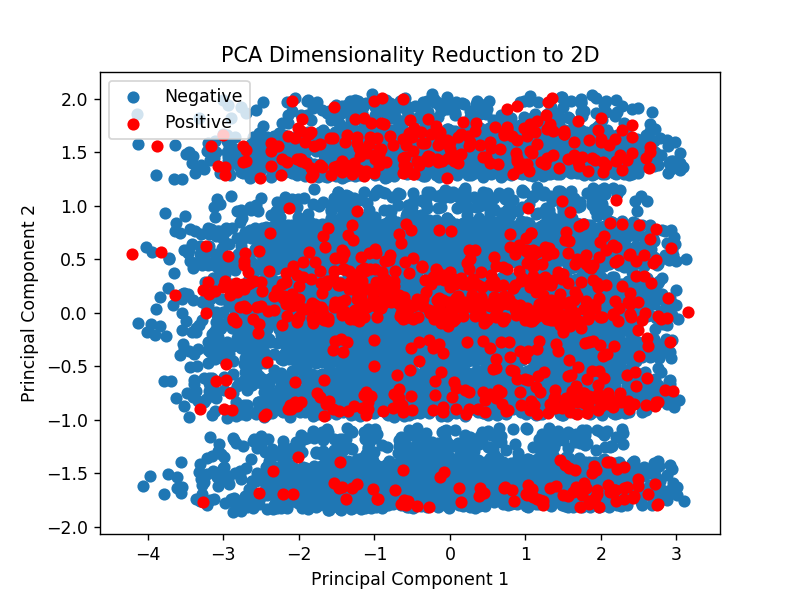

In [9]:
%matplotlib notebook
# Visualize data in 2D

# Plot projected the data onto 2D (test negative for outcome)
negative = plt.scatter(Proj_data_2D[:,0][y == 0], Proj_data_2D[:,1][y == 0])

# Plot projected the data onto 2D (test positive for outcome)
positive = plt.scatter(Proj_data_2D[:,0][y == 1], Proj_data_2D[:,1][y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["Negative", "Positive"])

# Show scatter plot
plt.show()

In [10]:
# Step 4: Project data onto 3d 

# Keep the first three principal components 
# P_reduce is k x 3 matrix
P_reduce = np.array(eigvectors_sort[0:3]).transpose()

# Let's project data onto 3D space
# The projected data in 3D will be n x 3 matrix
Proj_data_3D = np.dot(X_std,P_reduce)

<IPython.core.display.Javascript object>


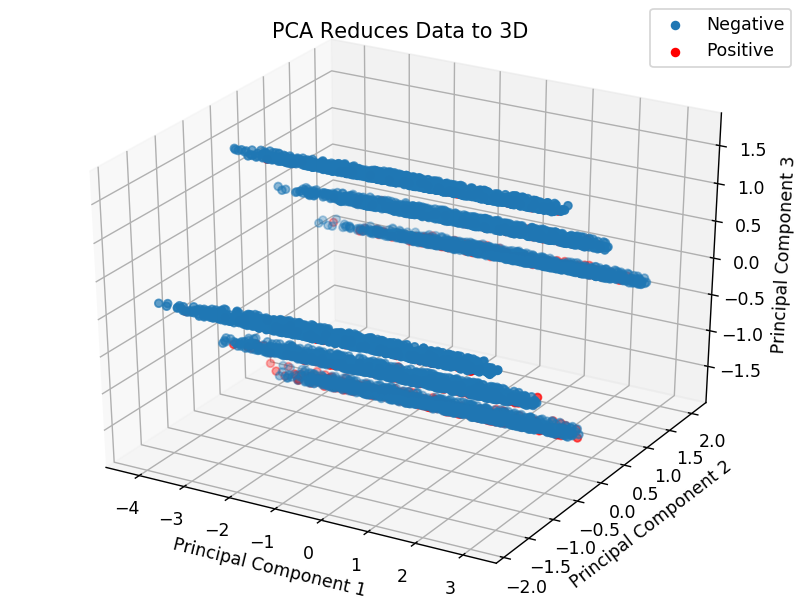

In [11]:
# Visualize data in 3D
from mpl_toolkits.mplot3d import Axes3D
# Define 3D figure
fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for outcome)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for outcome)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["Negative", "Positive"])

# Show 3D plot
plt.show()


## Conclusion

From the above, I have concluded that It would be reasonable to use PCA to reduce the data to 5features(dimentions) to speed up the algorithm with retaining over almost 90% of the original data variation when I decided to use classification algorithms to predict outcome.

# Part 2. PCA with scikit-learn

## Preamble and dataset

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('train1.csv')
from matplotlib import cm
X = df[['age', 'cost_of_ad','income','n_drivers','n_vehicles','prior_ins_tenure']]
y = df['outcome']

## Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

In [14]:
pca = PCA(n_components = 2).fit(X_normalized)

In [15]:
X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)

(10000, 6) (10000, 2)


## Plot the data

In [16]:
# helper function for visualization
def plot_labelled_scatter(X, y, class_labels):
    from matplotlib.colors import ListedColormap, BoundaryNorm
    import matplotlib.patches as mpatches
    import numpy
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

<IPython.core.display.Javascript object>


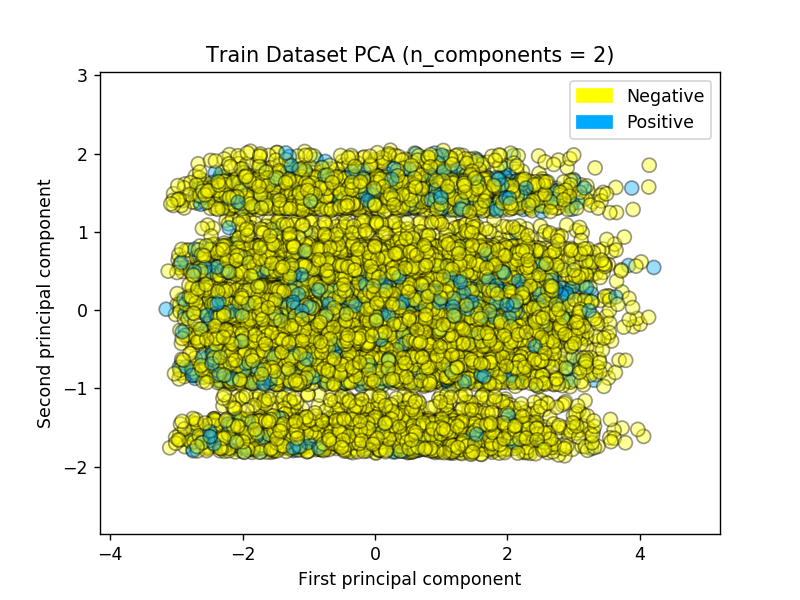

In [17]:
plot_labelled_scatter(X_pca, y, ['Negative', 'Positive'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Train Dataset PCA (n_components = 2)')

## Multidimensional scaling (MDS) 

In [18]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2)
X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y, ['Negative', 'Positive'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('train MDS (n_components = 2)')

MemoryError: 

## t-SNE 

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');